# Task 0

## Homework 4: Parallel and Distributed computing with Dask completed by Sebastian Perez

# Section D

## Task 1

In [1]:
# import statements
import os
import dask
from dask.distributed import Client
import dask.dataframe as dd
import pandas as pd
import glob

In [2]:
os.chdir("C:/U of U/Data Science and Big Data")
os.getcwd()

'C:\\U of U\\Data Science and Big Data'

In [3]:
filename = os.path.join('nycflights','*.csv')
filename

'nycflights\\*.csv'

In [7]:
ddf = dd.read_csv(filename)

In [8]:
pdf = pd.concat(map(pd.read_csv, glob.glob(filename)))

## Task 3

In [9]:
ddf

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
npartitions=10,,,,,,,,,,,,,,,,,,,,,,,
,int64,int64,int64,int64,float64,int64,float64,int64,string,int64,float64,float64,int64,float64,float64,float64,string,string,float64,float64,float64,int64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [10]:
pdf

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990,1,1,1,1621.0,1540,1747.0,1701,US,33,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990,1,2,2,1547.0,1540,1700.0,1701,US,33,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990,1,3,3,1546.0,1540,1710.0,1701,US,33,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990,1,4,4,1542.0,1540,1710.0,1701,US,33,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990,1,5,5,1549.0,1540,1706.0,1701,US,33,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269176,1999,12,27,1,1645.0,1645,1830.0,1901,UA,1753,...,205.0,-31.0,0.0,LGA,DEN,1619.0,7.0,13.0,0,0
269177,1999,12,28,2,1726.0,1645,1928.0,1901,UA,1753,...,214.0,27.0,41.0,LGA,DEN,1619.0,5.0,23.0,0,0
269178,1999,12,29,3,1646.0,1645,1846.0,1901,UA,1753,...,220.0,-15.0,1.0,LGA,DEN,1619.0,5.0,15.0,0,0
269179,1999,12,30,4,1651.0,1645,1908.0,1901,UA,1753,...,233.0,7.0,6.0,LGA,DEN,1619.0,5.0,19.0,0,0


In [11]:
ddf.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990,1,1,1,1621.0,1540,1747.0,1701,US,33,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990,1,2,2,1547.0,1540,1700.0,1701,US,33,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990,1,3,3,1546.0,1540,1710.0,1701,US,33,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990,1,4,4,1542.0,1540,1710.0,1701,US,33,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990,1,5,5,1549.0,1540,1706.0,1701,US,33,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


## Task 4

In [12]:
%timeit ddf = dd.read_csv(filename)
%timeit pdf = pd.concat(map(pd.read_csv, glob.glob('nycflights/*.csv')))

207 µs ± 61.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
11.5 s ± 169 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Task 5

In [13]:
ddf.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted'],
      dtype='object')

In [14]:
ddf.dtypes

Year                           int64
Month                          int64
DayofMonth                     int64
DayOfWeek                      int64
DepTime                      float64
CRSDepTime                     int64
ArrTime                      float64
CRSArrTime                     int64
UniqueCarrier        string[pyarrow]
FlightNum                      int64
TailNum                      float64
ActualElapsedTime            float64
CRSElapsedTime                 int64
AirTime                      float64
ArrDelay                     float64
DepDelay                     float64
Origin               string[pyarrow]
Dest                 string[pyarrow]
Distance                     float64
TaxiIn                       float64
TaxiOut                      float64
Cancelled                      int64
Diverted                       int64
dtype: object

## Task 6

In [15]:
ddf = dd.read_csv(filename, 
                 dtype={'CRSElapsedTime': 'float64',
                        'TailNum': 'object'})

ddf['Date'] = dd.to_datetime(ddf.pop('Year').astype(str) + '-' + 
                             ddf.pop('Month').astype(str) + '-' + 
                             ddf.pop('DayofMonth').astype(str),
                                format="%Y-%m-%d")

ddf['Date'].head()

0   1990-01-01
1   1990-01-02
2   1990-01-03
3   1990-01-04
4   1990-01-05
Name: Date, dtype: datetime64[ns]

In [16]:
len(ddf)

2611892

In [17]:
ddf.tail()

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,Date
269176,1,1645.0,1645,1830.0,1901,UA,1753,N516UA,225.0,256.0,...,-31.0,0.0,LGA,DEN,1619.0,7.0,13.0,0,0,1999-12-27
269177,2,1726.0,1645,1928.0,1901,UA,1753,N504UA,242.0,256.0,...,27.0,41.0,LGA,DEN,1619.0,5.0,23.0,0,0,1999-12-28
269178,3,1646.0,1645,1846.0,1901,UA,1753,N592UA,240.0,256.0,...,-15.0,1.0,LGA,DEN,1619.0,5.0,15.0,0,0,1999-12-29
269179,4,1651.0,1645,1908.0,1901,UA,1753,N575UA,257.0,256.0,...,7.0,6.0,LGA,DEN,1619.0,5.0,19.0,0,0,1999-12-30
269180,5,1642.0,1645,1851.0,1901,UA,1753,N539UA,249.0,256.0,...,-10.0,-3.0,LGA,DEN,1619.0,6.0,11.0,0,0,1999-12-31


In [18]:
ddf[['CRSElapsedTime','TailNum']].sample(frac=0.001).compute()

,CRSElapsedTime,TailNum
15568,234.0,NaN
158945,103.0,NaN
21870,117.0,NaN
156402,95.0,NaN
154479,260.0,NaN
...,...,...
26497,175.0,N325DL
108672,133.0,N606DL
87989,342.0,N625AW
34175,645.0,N35084


## Task 7

In [19]:
ddf['TailNum'].compute()

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
269176    N516UA
269177    N504UA
269178    N592UA
269179    N575UA
269180    N539UA
Name: TailNum, Length: 2611892, dtype: object

In [20]:
ddf.loc[ddf['ArrTime'] < ddf['ArrTime'].mean()].compute()

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,Date
88,1,1205.0,1110,1343.0,1243,US,49,NaN,98.0,93.0,...,60.0,55.0,LGA,CLE,418.0,NaN,NaN,0,0,1990-01-01
89,2,1158.0,1110,1327.0,1243,US,49,NaN,89.0,93.0,...,44.0,48.0,LGA,CLE,418.0,NaN,NaN,0,0,1990-01-02
90,3,1202.0,1110,1324.0,1243,US,49,NaN,82.0,93.0,...,41.0,52.0,LGA,CLE,418.0,NaN,NaN,0,0,1990-01-03
91,6,1126.0,1110,1322.0,1243,US,49,NaN,116.0,93.0,...,39.0,16.0,LGA,CLE,418.0,NaN,NaN,0,0,1990-01-06
92,7,1114.0,1110,1236.0,1243,US,49,NaN,82.0,93.0,...,-7.0,4.0,LGA,CLE,418.0,NaN,NaN,0,0,1990-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269146,1,1102.0,1100,1305.0,1311,UA,1685,N515UA,243.0,251.0,...,-6.0,2.0,LGA,DEN,1619.0,10.0,25.0,0,0,1999-12-27
269147,2,1058.0,1100,1305.0,1311,UA,1685,N598UA,247.0,251.0,...,-6.0,-2.0,LGA,DEN,1619.0,6.0,20.0,0,0,1999-12-28
269148,3,1057.0,1100,1308.0,1311,UA,1685,N517UA,251.0,251.0,...,-3.0,-3.0,LGA,DEN,1619.0,5.0,28.0,0,0,1999-12-29
269149,4,1056.0,1100,1312.0,1311,UA,1685,N502UA,256.0,251.0,...,1.0,-4.0,LGA,DEN,1619.0,6.0,23.0,0,0,1999-12-30


In [21]:
ddf.iloc[:,[1, 3,]].compute()

,DepTime,ArrTime
0,1621.0,1747.0
1,1547.0,1700.0
2,1546.0,1710.0
3,1542.0,1710.0
4,1549.0,1706.0
...,...,...
269176,1645.0,1830.0
269177,1726.0,1928.0
269178,1646.0,1846.0
269179,1651.0,1908.0


In [22]:
#ddf.iloc[[1, 3,]].compute()

## Task 8

In [23]:
ddf_partitions = dd.from_pandas(pdf, npartitions = 10)
ddf_partitions.partitions[1]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,
26119,int64,int64,int64,int64,float64,int64,float64,int64,string,int64,string,float64,float64,float64,float64,float64,string,string,float64,float64,float64,int64,int64
52238,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


## Task 9

### 9a

In [24]:
ddf.count().compute()

DayOfWeek            2611892
DepTime              2540961
CRSDepTime           2611892
ArrTime              2533682
CRSArrTime           2611892
UniqueCarrier        2611892
FlightNum            2611892
TailNum              1298886
ActualElapsedTime    2533682
CRSElapsedTime       2609927
AirTime              1255069
ArrDelay             2533682
DepDelay             2540961
Origin               2611892
Dest                 2611892
Distance             2610397
TaxiIn               1298886
TaxiOut              1298886
Cancelled            2611892
Diverted             2611892
Date                 2611892
dtype: int64

### 9b

In [25]:
ddf['Cancelled'].value_counts().compute()

Cancelled
1      70931
0    2540961
Name: count, dtype: int64

### 9c

In [26]:
ddf['DepDelay'].max().compute()

1435.0

### 9d

In [27]:
ddf[ddf['Cancelled'] == 1].compute()

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,Date
37,1,NaN,2050,NaN,2203,US,38,NaN,NaN,73.0,...,NaN,NaN,LGA,ORF,296.0,NaN,NaN,1,0,1990-01-08
55,1,NaN,2050,NaN,2203,US,38,NaN,NaN,73.0,...,NaN,NaN,LGA,ORF,296.0,NaN,NaN,1,0,1990-01-29
61,4,NaN,1850,NaN,1948,US,42,NaN,NaN,58.0,...,NaN,NaN,EWR,SYR,194.0,NaN,NaN,1,0,1990-01-04
207,1,NaN,645,NaN,850,US,93,NaN,NaN,125.0,...,NaN,NaN,LGA,IND,659.0,NaN,NaN,1,0,1990-01-01
259,4,NaN,1755,NaN,1942,US,105,NaN,NaN,107.0,...,NaN,NaN,JFK,PIT,340.0,NaN,NaN,1,0,1990-01-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268926,1,NaN,1846,NaN,2103,UA,1609,UNKNOW,NaN,257.0,...,NaN,NaN,EWR,DEN,1605.0,0.0,0.0,1,0,1999-12-20
269031,4,NaN,615,NaN,829,UA,401,UNKNOW,NaN,254.0,...,NaN,NaN,LGA,DEN,1619.0,0.0,0.0,1,0,1999-12-16
269093,2,NaN,1650,NaN,1906,UA,785,UNKNOW,NaN,256.0,...,NaN,NaN,LGA,DEN,1619.0,0.0,0.0,1,0,1999-12-14
269153,5,NaN,1400,NaN,1613,UA,1691,UNKNOW,NaN,253.0,...,NaN,NaN,LGA,DEN,1619.0,0.0,0.0,1,0,1999-12-17


### 9e

In [28]:
len(ddf[ddf['DayOfWeek'] == 1].compute())

388011

### 9f

In [29]:
ddf[ddf['Cancelled'] == 0].groupby('Origin').size().compute()

Origin
EWR    1139451
JFK     427243
LGA     974267
dtype: int64

### 9f Bonus

In [30]:
total_flights = ddf.groupby('Origin').size()

non_cancelled = ddf[ddf['Cancelled'] == 0].groupby('Origin').size()

ratio = (non_cancelled / total_flights).compute()

ratio

Origin
EWR    0.970463
JFK    0.983658
LGA    0.970946
dtype: float64

### 9g

In [31]:
ddf.groupby(['Origin', 'DayOfWeek'])['DepDelay'].mean().compute()

Origin  DayOfWeek
EWR     1             9.115922
        2             9.179402
        3            10.606154
        4            12.069740
        5            13.154202
        6             8.053139
        7             9.432185
JFK     1             8.884113
        2             8.841036
        3             9.448858
        4            10.846967
        5            12.339922
        6            11.191893
        7            10.947545
LGA     1             6.580465
        2             6.659778
        3             7.311600
        4             8.620151
        5             9.151866
        6             5.800159
        7             7.589457
Name: DepDelay, dtype: float64

### 9h

In [32]:
ddf[ddf['Dest'].isin(['JFK', 'LGA', 'EWR'])].groupby('Dest').mean(numeric_only=True).compute()


,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
Dest,,,,,,,,,,,,,,,,
EWR,3.838710,1216.100000,885.483871,1068.833333,845.612903,559.225806,45.166667,32.233333,27.777778,34.583333,23.766667,19.064516,7.111111,23.666667,0.032258,0.193548
LGA,4.625000,1313.500000,795.000000,1164.833333,821.375000,2310.500000,37.500000,31.125000,8.800000,25.500000,37.000000,14.750000,7.200000,18.400000,0.000000,0.250000
JFK,5.166667,1652.166667,1679.833333,1765.000000,1731.666667,1009.666667,59.500000,30.166667,19.500000,114.166667,84.833333,17.666667,7.000000,18.500000,0.000000,0.000000


### 9i

In [33]:
ddf['Year'] = ddf['Date'].dt.year

ddf.groupby('Year')[['ActualElapsedTime', 'Distance']].max().compute()


,ActualElapsedTime,Distance
Year,,
1990,595.0,2586.0
1991,632.0,2586.0
1992,703.0,2586.0
1993,675.0,2586.0
1994,647.0,2586.0
1995,581.0,2586.0
1996,620.0,2586.0
1997,587.0,2586.0
1998,743.0,4962.0


## Task 10

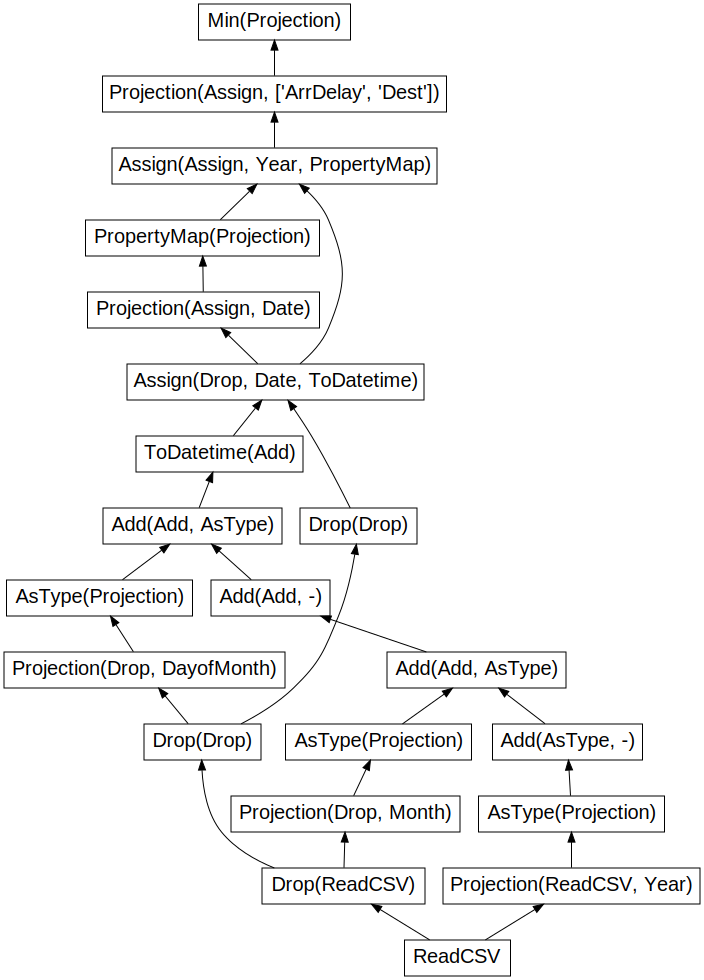

In [35]:
ddf.groupby("Dest")["ArrDelay"].min().visualize()

## Task 11

In [1]:
from dask.distributed import Client
client = Client()
print(client)

<Client: 'tcp://127.0.0.1:64581' processes=4 threads=8, memory=15.79 GiB>


In [37]:
from dask.distributed import Client
client = Client(n_workers = 5, threads_per_worker = 4)
print(client)

<Client: 'tcp://127.0.0.1:49685' processes=5 threads=20, memory=15.79 GiB>


In [36]:
ddf.groupby("Dest")["ArrDelay"].min().compute()

Dest
ABE    -33.0
ALB    -26.0
ATL   -311.0
BDL    -39.0
BGR    -30.0
       ...  
AUS    -65.0
CRP    -16.0
HNL    -63.0
BHM    -30.0
TUS    -55.0
Name: ArrDelay, Length: 99, dtype: float64

In [14]:
#Progress bar
from dask.diagnostics import ProgressBar
ProgressBar().register()

## Task 12

In [17]:
x = ddf.groupby("Dest")["ArrDelay"].min()
x.compute(scheduler = 'threads')

[########################################] | 100% Completed | 2.44 ss


Dest
ABE    -33.0
ALB    -26.0
ATL   -311.0
BDL    -39.0
BGR    -30.0
       ...  
AUS    -65.0
CRP    -16.0
HNL    -63.0
BHM    -30.0
TUS    -55.0
Name: ArrDelay, Length: 99, dtype: float64

In [18]:
with dask.config.set(scheduler='processes'):
    print(x.compute())

[########################################] | 100% Completed | 9.39 ss
Dest
ABE    -33.0
ALB    -26.0
ATL   -311.0
BDL    -39.0
BGR    -30.0
       ...  
AUS    -65.0
CRP    -16.0
HNL    -63.0
BHM    -30.0
TUS    -55.0
Name: ArrDelay, Length: 99, dtype: float64


# Section E

## Task 1

In [9]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 10000, n_features=4,random_state=0)

In [10]:
X[:8]

array([[-0.77244139,  0.3607576 , -2.38110133,  0.08757   ],
       [ 1.14946035,  0.62254594,  0.37302939,  0.45965795],
       [-1.90879217, -1.1602627 , -0.27364545, -0.82766028],
       [-0.77694695,  0.31434299, -2.26231851,  0.06339125],
       [-1.17047054,  0.02212382, -2.17376797, -0.13421976],
       [ 0.79010037,  0.68530624, -0.44740487,  0.44692959],
       [ 1.68616989,  1.6329131 , -1.42072654,  1.04050557],
       [-0.93912893, -1.02270838,  1.10093827, -0.63714432]])

In [11]:
y[:8]

array([0, 0, 1, 0, 0, 0, 0, 1])

## Task 2

In [12]:
from sklearn.svm import SVC

In [13]:
estimator = SVC(random_state=42)
estimator.fit(X, y)

SVC(random_state=42)

In [14]:
estimator.support_vectors_[:5]

array([[-0.77244139,  0.3607576 , -2.38110133,  0.08757   ],
       [ 1.14946035,  0.62254594,  0.37302939,  0.45965795],
       [-0.77694695,  0.31434299, -2.26231851,  0.06339125],
       [ 0.79010037,  0.68530624, -0.44740487,  0.44692959],
       [ 0.06135861, -0.32391974,  0.99651845, -0.15720499]])

In [15]:
estimator.score(X, y)

0.905

## Task 3

In [16]:
estimator = SVC(C=0.00001, shrinking = False, random_state=0)
estimator.fit(X, y)
estimator.support_vectors_[:4]

array([[-0.77244139,  0.3607576 , -2.38110133,  0.08757   ],
       [ 1.14946035,  0.62254594,  0.37302939,  0.45965795],
       [-0.77694695,  0.31434299, -2.26231851,  0.06339125],
       [-1.17047054,  0.02212382, -2.17376797, -0.13421976]])

In [17]:
estimator.score(X, y)

0.5007

## Task 4

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
estimator = SVC(gamma='auto', probability=True, random_state=42 )

param_grid = {
    'C': [0.001, 10.0],
    'kernel': ['rbf','poly','linear'],
}

In [20]:
grid_search = GridSearchCV(estimator, param_grid, verbose=2, cv=2)

In [22]:
%time grid_search.fit(X, y)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] END ................................C=0.001, kernel=rbf; total time=  23.7s
[CV] END ................................C=0.001, kernel=rbf; total time=  21.8s
[CV] END ...............................C=0.001, kernel=poly; total time=   8.9s
[CV] END ...............................C=0.001, kernel=poly; total time=   8.9s
[CV] END .............................C=0.001, kernel=linear; total time=   6.6s
[CV] END .............................C=0.001, kernel=linear; total time=   7.6s
[CV] END .................................C=10.0, kernel=rbf; total time=   6.1s
[CV] END .................................C=10.0, kernel=rbf; total time=   5.5s
[CV] END ................................C=10.0, kernel=poly; total time=   8.9s
[CV] END ................................C=10.0, kernel=poly; total time=   7.9s
[CV] END ..............................C=10.0, kernel=linear; total time=  12.9s
[CV] END ..............................C=10.0, ke

GridSearchCV(cv=2,
             estimator=SVC(gamma='auto', probability=True, random_state=42),
             param_grid={'C': [0.001, 10.0],
                         'kernel': ['rbf', 'poly', 'linear']},
             verbose=2)

## Task 5

In [23]:
import os

n_cpu = os.cpu_count()
print("Number of CPUs in the system:", n_cpu)

Number of CPUs in the system: 8


In [50]:
grid_search_MC = GridSearchCV(estimator,
                              param_grid,
                              verbose=2,
                              cv=2,
                              n_jobs=-1)

In [51]:
%time grid_search_MC.fit(X, y)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
CPU times: total: 9.05 s
Wall time: 28.9 s


GridSearchCV(cv=2,
             estimator=SVC(gamma='auto', probability=True, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.001, 10.0],
                         'kernel': ['rbf', 'poly', 'linear']},
             verbose=2)

In [52]:
grid_search_MC.best_params_, grid_search_MC.best_score_

({'C': 10.0, 'kernel': 'rbf'}, 0.9086000000000001)

## Task 6

In [21]:
import joblib

In [27]:
param_grid = {
    'C': [0.001, 0.1, 1.0, 2.5, 5., 10.0, 100., 500., 1000.],

    #'kernel': ['rbf', 'poly', 'linear'],
    #'shrinking': [True, False]
}

In [28]:
grid_search_Dist = GridSearchCV(estimator,
                                param_grid,
                                verbose=2,
                                cv=5,
                                n_jobs=-1)

In [29]:
%%time
with joblib.parallel_backend("dask"):
  grid_search_Dist.fit(X, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
CPU times: total: 1min 34s
Wall time: 4min 48s


In [30]:
pd.DataFrame(grid_search_Dist.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,90.783098,5.238233,6.885213,0.256496,0.001,{'C': 0.001},0.8495,0.8210,0.8350,0.8245,0.8320,0.8324,0.009917,9
1,29.661190,1.243304,2.412927,0.062721,0.100,{'C': 0.1},0.9025,0.8850,0.8815,0.8825,0.8865,0.8876,0.007658,8
2,24.922516,1.994175,2.014497,0.177127,1.000,{'C': 1.0},0.9185,0.9065,0.8935,0.8975,0.9110,0.9054,0.009035,7
3,22.143136,0.993860,1.775055,0.128038,2.500,{'C': 2.5},0.9200,0.9120,0.8960,0.9005,0.9155,0.9088,0.009092,6
4,21.432101,0.193928,1.692090,0.074746,5.000,{'C': 5.0},0.9190,0.9155,0.8995,0.9055,0.9180,0.9115,0.007675,5


In [31]:
grid_search_Dist.best_params_, grid_search_Dist.best_score_

({'C': 500.0}, 0.914)

In [32]:
y_pred = grid_search_Dist.predict(X)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      4993
           1       0.88      0.96      0.92      5007

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



## Task 7

In [39]:
client.shutdown()